In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("IPODayOne.csv")

In [3]:
df.dropna(inplace = True)

In [6]:
df.head()

,GrossSpread,MarketValue,OfferPrice,Shares_offered,Syndicated,Num_underwriters,Day1Perf
0,740600.0,672,48,1150000,0,3,1
1,16351563.0,647,18,12500000,0,10,1
2,11765149.0,475,10,23157895,0,5,1
3,877675.0,29,5,1888888,0,1,1
4,1045781.0,427,8,1875000,0,2,1


In [4]:
def remove_outliers_iqr(df):
    """
    Remove outliers from numerical columns in a DataFrame using the Interquartile Range (IQR) method.
    
    Parameters:
        df (DataFrame): Input DataFrame.
    
    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Copy the input DataFrame to avoid modifying the original DataFrame
    df_cleaned = df.copy()
    
    # Counter to keep track of the number of data points removed
    num_removed = 0
    
    # Iterate over numerical columns
    for column in df_cleaned.select_dtypes(include='number').columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        q1 = df_cleaned[column].quantile(0.25)
        q3 = df_cleaned[column].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        iqr = q3 - q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Count outliers and replace with NaN
        outliers = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
        num_removed += outliers.sum()
        df_cleaned.loc[outliers, column] = np.nan
    
    # Drop rows containing NaN values (outliers)
    df_cleaned = df_cleaned.dropna()
    
    # Print the number of data points removed
    print(f"Number of data points removed: {num_removed}")
    
    return df_cleaned

In [5]:
def build_linear_regression_model(data, target_column):
    """
    Build a linear regression model based on the input DataFrame and target column.
    
    Parameters:
        data (DataFrame): The input DataFrame.
        target_column (str): The name of the target column.
    
    Returns:
        dict: A dictionary containing train score, test score, mean squared error, model coefficients, and the scatter plot.
    """
    # Extract features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate train and test scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Calculate mean squared error
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    # Get model coefficients
    coefficients = model.coef_
    
    # Create dictionary to store results
    results = {
        'train_score': train_score,
        'test_score': test_score,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'coefficients': coefficients
    }
    
    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_test)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Plot the diagonal line
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
    
    return results

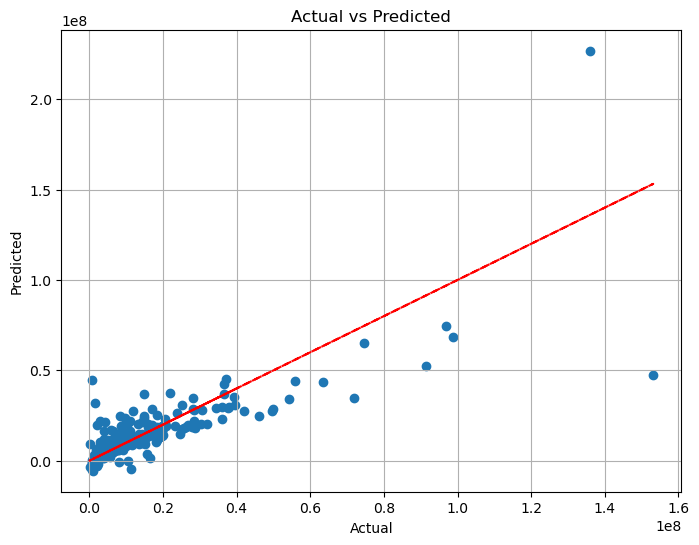

{'train_score': 0.6548641637730543,
 'test_score': 0.605126528754172,
 'mse_train': 153558873937145.34,
 'mse_test': 143358921838486.97,
 'coefficients': array([-5.48213856e+02,  5.58208997e+05,  4.55000881e-01,  3.25360200e+06,
         1.18832861e+06,  1.28118313e+06])}

In [7]:
build_linear_regression_model(df, "GrossSpread")